In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
spot10 = pd.read_csv('2010.csv', index_col=0)
spot11 = pd.read_csv('2011.csv', index_col=0)
spot12 = pd.read_csv('2012.csv', index_col=0)
spot13 = pd.read_csv('2013.csv', index_col=0)
spot14 = pd.read_csv('2014.csv', index_col=0)
spot15 = pd.read_csv('2015.csv', index_col=0)
spot16 = pd.read_csv('2016.csv', index_col=0)
spot17 = pd.read_csv('2017.csv', index_col=0)
spot18 = pd.read_csv('2018.csv', index_col=0)
spot19 = pd.read_csv('2019.csv', index_col=0)

In [3]:
spotlist=[spot10, spot11, spot12, spot13, spot14, spot15, spot16, spot17, spot18, spot19]
for df in spotlist:
    print(df.shape)

(51, 14)
(53, 14)
(35, 14)
(71, 14)
(58, 14)
(95, 14)
(80, 14)
(65, 14)
(64, 14)
(31, 14)


In [4]:
all_top_songs = pd.concat([spot10, spot11, spot12, spot13, spot14, spot15, spot16, spot17, spot18, spot19])
all_top_songs.shape

(603, 14)

In [5]:
all_top_songs.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [6]:
all_top_songs.dtypes # confirming numeric data is the proper 'int' data type.

title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

In [8]:
all_top_songs['top genre'].unique()

array(['neo mellow', 'detroit hip hop', 'dance pop', 'pop',
       'canadian pop', 'hip pop', 'barbadian pop', 'atl hip hop',
       'australian pop', 'indie pop', 'art pop', 'colombian pop',
       'big room', 'british soul', 'chicago rap', 'acoustic pop',
       'permanent wave', 'boy band', 'baroque pop', 'celtic rock',
       'electro', 'complextro', 'canadian hip hop', 'candy pop',
       'alaska indie', 'folk-pop', 'metropopolis', 'house',
       'australian hip hop', 'electropop', 'australian dance',
       'hollywood', 'canadian contemporary r&b',
       'irish singer-songwriter', 'tropical house', 'belgian edm',
       'french indie pop', 'hip hop', 'danish pop', 'latin',
       'canadian latin', 'electronic trap', 'edm', 'electro house',
       'downtempo', 'brostep', 'contemporary country', 'moroccan pop',
       'escape room', 'alternative r&b'], dtype=object)

## Q3: Most Popular Song

- The 'pop' column contains the popularity scores for each song, so to find the most popular song I sorted the data set by popularity in descending order. I took the top 5 songs to make sure there was not a tie for first. The song with the highest pop score in the 2010s is **Memories** by Maroon 5.

In [19]:
top_songs = all_top_songs.sort_values(by='pop', ascending=False)[:5]
top_songs

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
574,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97
575,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96
576,Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,9,75,191,4,3,95
577,How Do You Sleep?,Sam Smith,pop,2019,111,68,48,-5,8,35,202,15,9,93


## Q4: Most Prolific Artist

To find the top artist, I grouped the data set by 'artist', and used the size() function to determine how many times each artist appeared in the data. I sorted the series by descending order, and discovered the artist with most appearances in the top lists in the 2010s is **Katy Perry** with 17 appearances. 


In [25]:
all_top_songs.artist.unique().size #184 total artists
top_artists = all_top_songs.groupby('artist').size().sort_values(ascending=False)[:5]
top_artists

artist
Katy Perry       17
Justin Bieber    16
Maroon 5         15
Rihanna          15
Lady Gaga        14
dtype: int64

## Q5: Top Genre

To find the top genre, I took grouped the data set by 'top genre', and took the size to see how many times each genre is represented. By far the most popular genre in the 2010s is **Dance Pop**, with 327 of the 603 songs in the data belonging to that category. 

In [26]:
all_top_songs['top genre'].unique().size #50 genres represented
top_genres = all_top_songs.groupby('top genre').size().sort_values(ascending=False)[:5]
top_genres

top genre
dance pop        327
pop               60
canadian pop      34
boy band          15
barbadian pop     15
dtype: int64

## Q6: duplicate songs 

I first looked at all duplicated song titles. The duplicated() method returned 19 results, and after viewing the song rows using .loc[], I noticed 3 of the songs with duplicate titles were by different artsists (so there were 16 duplicated songs in total). I also noticed the duplicated songs were from different (consecutive) years which, after some further internet research, can can perhaps be explained by the fact that the songs were first released later in the calendar year, and their popularity continued into the next calendar year. Further research is definitely needed into this hypothesis.

There are 16 duplicated songs are: 

**'Just the Way You Are'**, **'Marry You'**, **'Written in the Stars (feat. Eric Turner)'**, **'Castle Walls (feat. Christina Aguilera)'**, **'We Are Never Ever Getting Back Together'**, **'A Little Party Never Killed Nobody (All We Got)'**, **'Sugar'**, **'The Hills'**, **'Love Yourself'**, **'Stitches'**, **'Company'**, **"Runnin' (Lose It All)"**, **'Here'**, **'All I Ask'**, **'First Time'**, **'Kissing Strangers'**

In [21]:
duplicated = all_top_songs.loc[all_top_songs.duplicated(subset=['title', 'artist'])] #subset includes artist as well, as some duplicated titles are by different artists 
duplicate_titles = pd.concat(g for a, g in all_top_songs.groupby(['title', 'artist']) if len(g) > 1)
duplicated.title.unique()

array(['Just the Way You Are', 'Marry You',
       'Written in the Stars (feat. Eric Turner)',
       'Castle Walls (feat. Christina Aguilera)',
       'We Are Never Ever Getting Back Together',
       'A Little Party Never Killed Nobody (All We Got)', 'Sugar',
       'The Hills', 'Love Yourself', 'Stitches', 'Company',
       "Runnin' (Lose It All)", 'Here', 'All I Ask', 'First Time',
       'Kissing Strangers'], dtype=object)

In [22]:
duplicate_titles

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
179,A Little Party Never Killed Nobody (All We Got),Fergie,dance pop,2013,130,62,76,-6,9,52,241,1,18,65
240,A Little Party Never Killed Nobody (All We Got),Fergie,dance pop,2014,130,62,76,-6,9,52,241,1,18,65
399,All I Ask,Adele,british soul,2016,142,28,59,-5,15,34,272,88,3,71
474,All I Ask,Adele,british soul,2017,142,28,59,-5,15,34,272,88,3,71
49,Castle Walls (feat. Christina Aguilera),T.I.,atl hip hop,2010,80,86,45,-5,26,58,329,7,39,49
96,Castle Walls (feat. Christina Aguilera),T.I.,atl hip hop,2011,80,86,45,-5,26,58,329,7,39,49
302,Company,Justin Bieber,canadian pop,2015,95,80,59,-5,8,43,208,13,6,72
397,Company,Justin Bieber,canadian pop,2016,95,80,59,-5,8,43,208,13,6,72
475,First Time,Kygo,edm,2017,90,59,63,-7,10,68,194,20,11,71
549,First Time,Kygo,edm,2018,90,59,63,-7,10,68,194,20,11,71


In [13]:
all_top_songs.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## Q7: Popularity vs. Danceability: 

There does not seem to be a significant correlation between danceability and popularity according to the combined data. As danceability increases, the range of popularity score stays the same.

(20.0, 101.85)

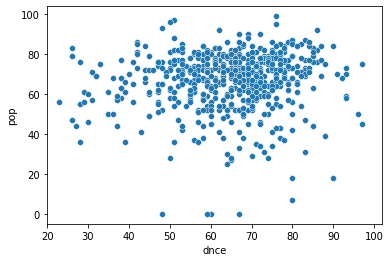

In [14]:
sns.scatterplot(data=all_top_songs, x='dnce', y='pop')
plt.xlim(20)

(20.0, 101.85)

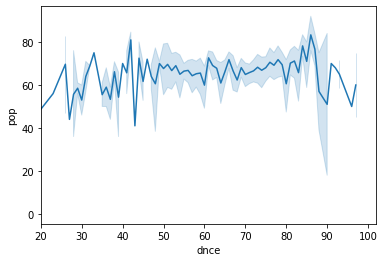

In [15]:
sns.lineplot(data=all_top_songs, x='dnce', y='pop')
plt.xlim(20)

## Q8: BPM vs NRG

Surprisingly, there does **not** seem to be a strong correlation between bpm and energy score. Similar with danceability vs. popularity, there seems to be clustering in the bpm ranges where most songs fall. It could be argued that as the bpm increases between 100 to 130 there is an increase in energy, but further analysis is needed.

(50.0, 160.0)

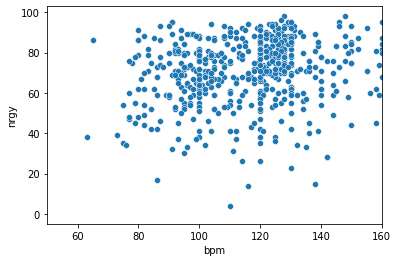

In [16]:
sns.scatterplot(data=all_top_songs, x='bpm', y='nrgy')
plt.xlim(50, 160)

(50.0, 160.0)

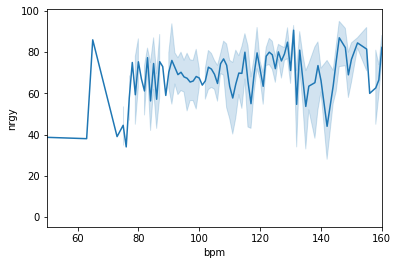

In [17]:
sns.lineplot(data=all_top_songs, x='bpm', y='nrgy')
plt.xlim(50, 160)

## Q9: Highest Energy Score

To find the top energy score, I grouped the combined data by genre, and aggregated energy scores for each genre. The top energy score genre for the 2010s is dance pop, with a total combined energy score of 23814.

In [18]:
all_top_songs.groupby('top genre')['nrgy'].sum().reset_index().sort_values(by='nrgy', ascending=False)[:5]

,top genre,nrgy
25,dance pop,23814
48,pop,4098
18,canadian pop,2316
12,boy band,1204
8,barbadian pop,1027
